C:\Users\devra\AppData\Local\Temp\ipykernel_12012\3773776711.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warn

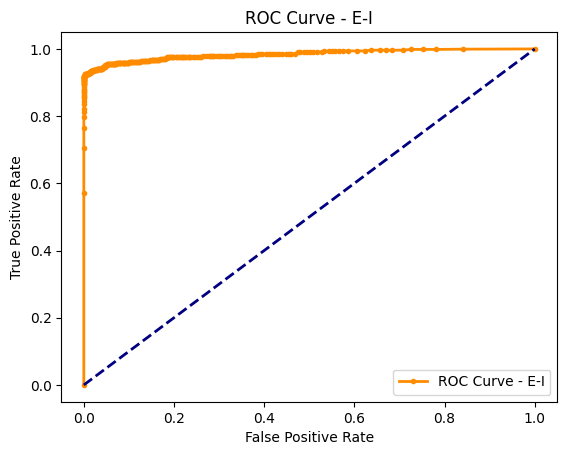

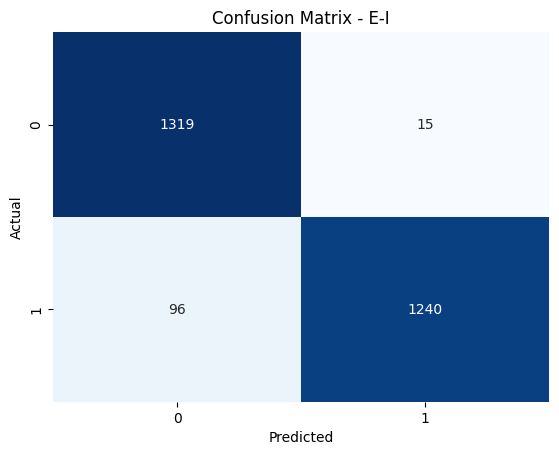

C:\Users\devra\AppData\Local\Temp\ipykernel_12012\3773776711.py:98: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_df = pd.concat([evaluation_df, pd.DataFrame({


D:\\devra\\Downloads\\stacking_results\\StackingClassifier_E-I.sav


c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

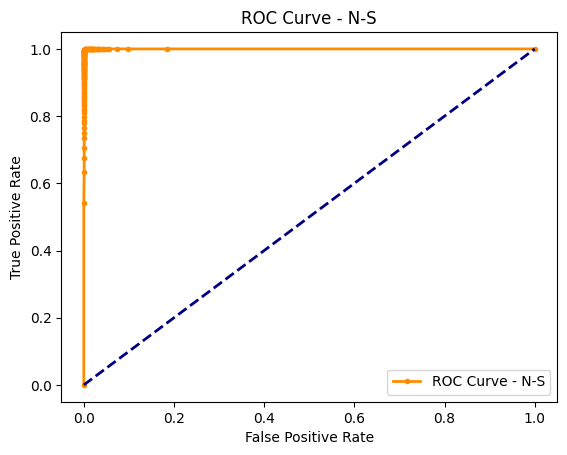

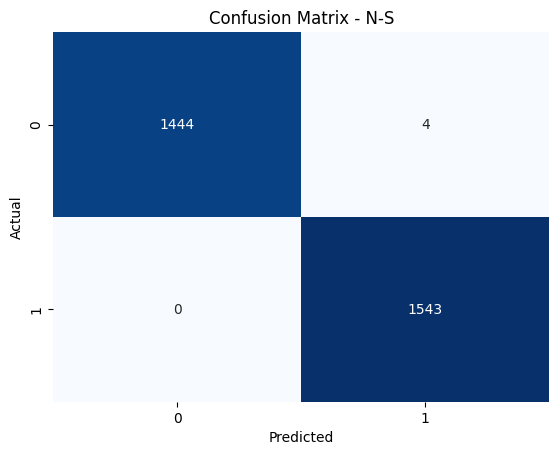

D:\\devra\\Downloads\\stacking_results\\StackingClassifier_N-S.sav


c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

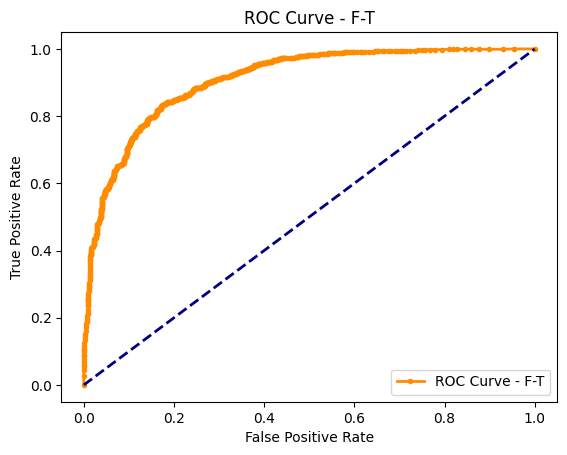

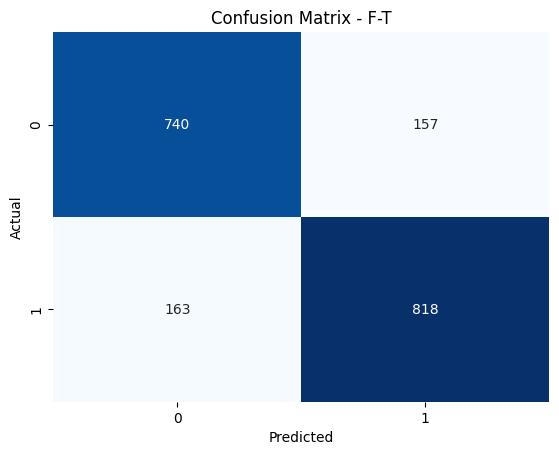

D:\\devra\\Downloads\\stacking_results\\StackingClassifier_F-T.sav


c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

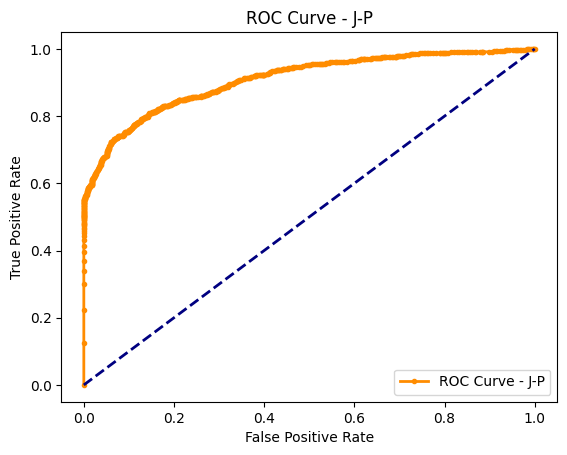

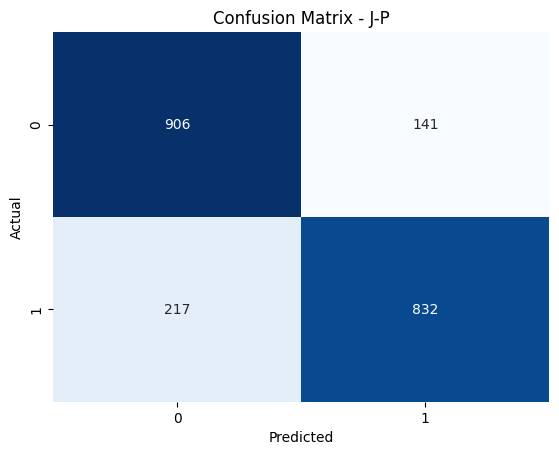

D:\\devra\\Downloads\\stacking_results\\StackingClassifier_J-P.sav
  Target  Accuracy  Precision    Recall  F1-Score   Roc-AUC
0    E-I  0.958427   0.988048  0.928144  0.957159  0.984277
1    N-S  0.998663   0.997414  1.000000  0.998706  0.999568
2    F-T  0.829606   0.838974  0.833843  0.836401  0.907549
3    J-P  0.829198   0.855087  0.793136  0.822948  0.909102


In [1]:
#### STacking
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

ROOT = r"C:\\Users\\devra\\Downloads\\Codes_PhD"
DATA_DIR = rf"{ROOT}\\dataset\\bvclassifier"
MBTI_RAW_CSV_PATH = os.path.join(DATA_DIR, "mbti_clean_biTri.csv")
MODEL = rf"{ROOT}\\models\\trained_ml_0603\\"
OUTPUT = r"D:\\devra\\Downloads\\stacking_results\\"

data = pd.read_csv(MBTI_RAW_CSV_PATH)

training_data = data[["cleaned_post", "E-I", "N-S", "F-T", "J-P"]].copy()
def make_dummies(data, columns=["E-I", "N-S", "F-T", "J-P"]):
    for column in columns:
        temp_dummy = pd.get_dummies(data[column], prefix="type")
        data = data.join(temp_dummy)
    return data
training_data = make_dummies(training_data)

X = training_data[["cleaned_post"]]
y = training_data.drop(columns=["cleaned_post"])

oversample = RandomOverSampler()

vectorizer = TfidfVectorizer(max_features=10000)
vectorizer.fit(X["cleaned_post"])
X_transformed = vectorizer.transform(X["cleaned_post"])

y_columns = ["E-I", "N-S", "F-T", "J-P"]
evaluation_df = pd.DataFrame(columns=["Target", "Accuracy", "Precision", "Recall", "F1-Score", "Roc-AUC"])

for target_name in y_columns:
    y_target = y[f"type_{target_name[0]}"]
    X_over, y_over = oversample.fit_resample(X_transformed, y_target)

    X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

    base_models = [(name, pickle.load(open(f'{MODEL}{name}_{target_name}.sav', 'rb'))) for name in ["NaiveBayes","DecisionTree",
                                                                                                    "RandomForest", "Xgboost",
                                                                                                    "AdaBoost","LogisticRegression"]]

    # Use Logistic Regression as the final meta-classifier
    meta_classifier = RandomForestClassifier(n_estimators=750)

    # Create the StackingClassifier
    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_classifier, stack_method='auto')

    # Fit the StackingClassifier
    stacking_clf.fit(X_train, y_train)

    # Get the predictions for the test data
    stacking_pred_proba_test = stacking_clf.predict_proba(X_test)[:, 1]

    # Evaluate the ensemble
    accuracy = metrics.accuracy_score(y_test, stacking_pred_proba_test.round())
    precision = metrics.precision_score(y_test, stacking_pred_proba_test.round())
    recall = metrics.recall_score(y_test, stacking_pred_proba_test.round())
    f1_score = metrics.f1_score(y_test, stacking_pred_proba_test.round())
    roc_auc = metrics.roc_auc_score(y_test, stacking_pred_proba_test)

    # Plot ROC curve
    fpr, tpr, _ = metrics.roc_curve(y_test, stacking_pred_proba_test, drop_intermediate=False)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve - {target_name}', marker='.')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {target_name}')
    plt.legend(loc='lower right')
    plt.savefig(f'{OUTPUT}ROC_{target_name}_stacking_RF.png')
    plt.show()

    # Plot Confusion Matrix
    stacking_pred_binary = stacking_pred_proba_test.round()
    cm = confusion_matrix(y_test, stacking_pred_binary)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {target_name}')
    plt.savefig(f'{OUTPUT}ConfusionMatrix_{target_name}_stacking_RF.png')
    plt.show()

    # Update the evaluation_df DataFrame
    evaluation_df = pd.concat([evaluation_df, pd.DataFrame({
        "Target": [target_name],
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1-Score": [f1_score],
        "Roc-AUC": [roc_auc]
    })], ignore_index=True)

    # Save the Stacking Classifier
    stacking_filename = f'{OUTPUT}StackingClassifier_{target_name}.sav'
    print(stacking_filename)
    pickle.dump(stacking_clf, open(stacking_filename, 'wb'))

# Save the evaluation_df to a CSV file
evaluation_df.to_csv(os.path.join(OUTPUT, 'evaluation_StackingClassifier_RF.csv'), index=False)
print(evaluation_df)

c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

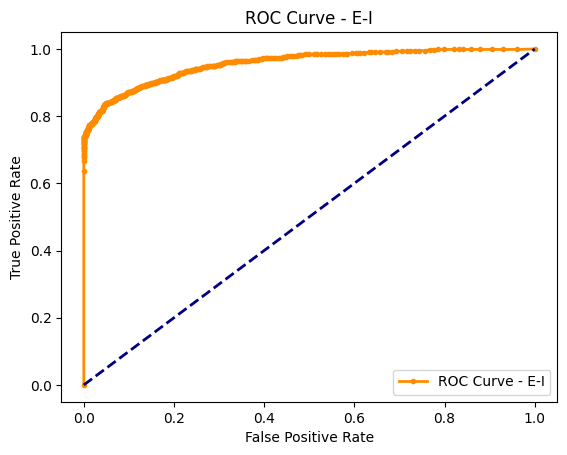

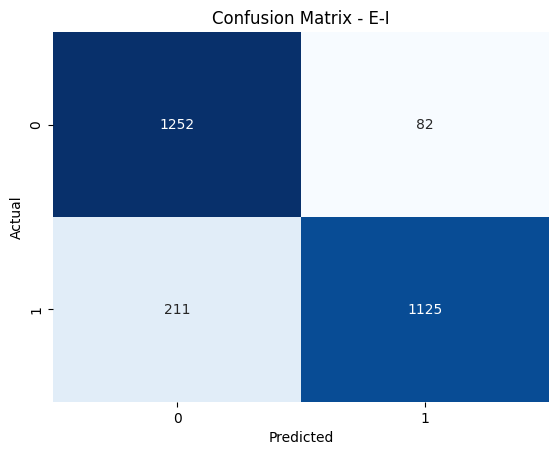

C:\Users\devra\AppData\Local\Temp\ipykernel_9444\225583344.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_df = pd.concat([evaluation_df, pd.DataFrame({


D:\\devra\\Downloads\\stacking_results\\StackingSMOTE_E-I.sav


c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

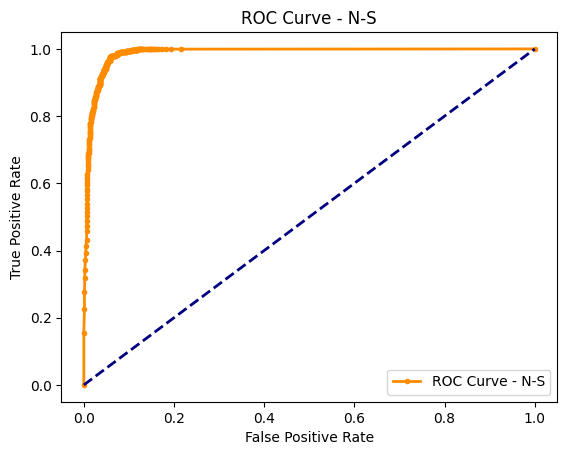

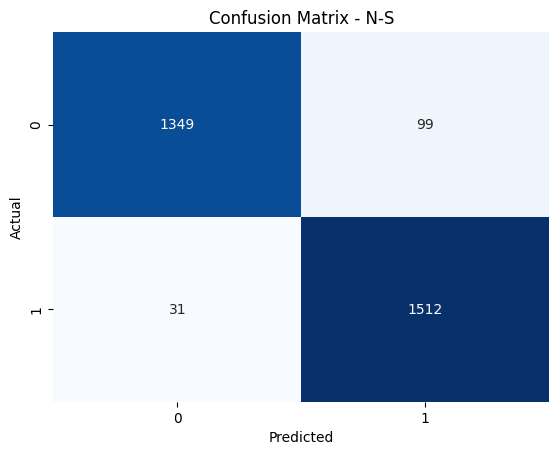

D:\\devra\\Downloads\\stacking_results\\StackingSMOTE_N-S.sav


c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

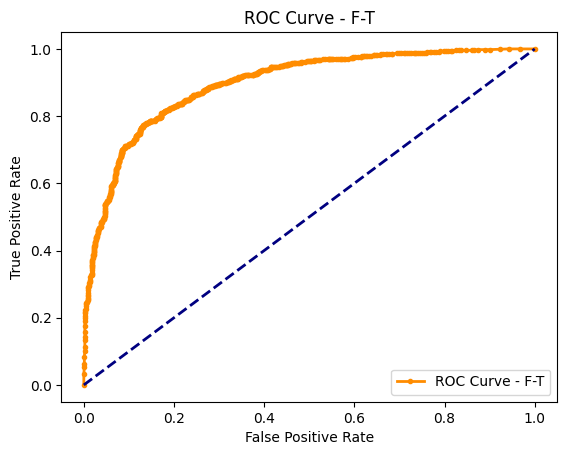

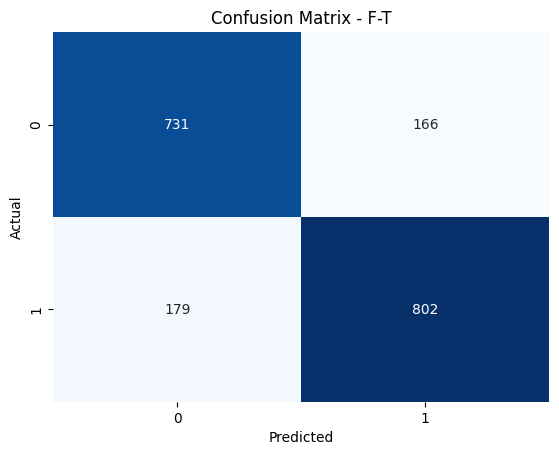

D:\\devra\\Downloads\\stacking_results\\StackingSMOTE_F-T.sav


c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

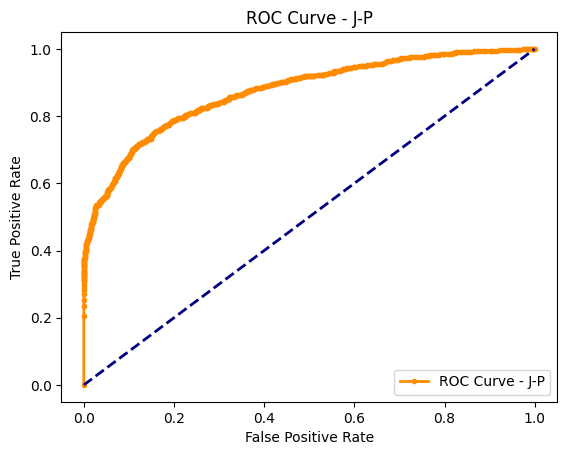

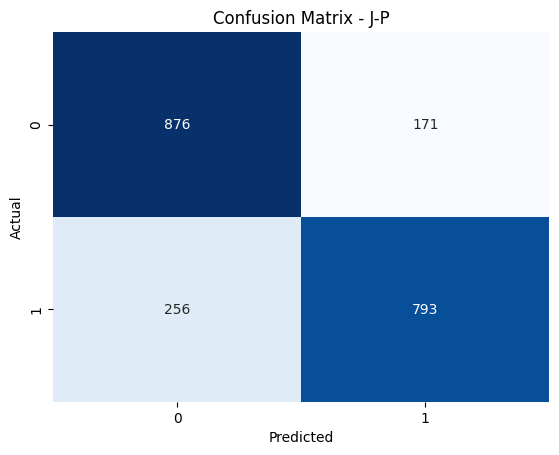

D:\\devra\\Downloads\\stacking_results\\StackingSMOTE_J-P.sav
  Target  Accuracy  Precision    Recall  F1-Score   Roc-AUC
0    E-I  0.890262   0.932063  0.842066  0.884782  0.956594
1    N-S  0.956536   0.938547  0.979909  0.958782  0.987702
2    F-T  0.816294   0.828512  0.817533  0.822986  0.896044
3    J-P  0.796279   0.822614  0.755958  0.787879  0.873885


In [2]:
from numpy import hstack
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler

ROOT = r"C:\\Users\\devra\\Downloads\\Codes_PhD"
DATA_DIR = rf"{ROOT}\\dataset\\bvclassifier"
MBTI_RAW_CSV_PATH = os.path.join(DATA_DIR, "mbti_clean_biTri.csv")
MODEL = rf"{ROOT}\\models\\trained_ml_0603\\"
OUTPUT = r"D:\\devra\\Downloads\\stacking_results\\"

data = pd.read_csv(MBTI_RAW_CSV_PATH)

training_data = data[["cleaned_post", "E-I", "N-S", "F-T", "J-P"]].copy()
def make_dummies(data, columns=["E-I", "N-S", "F-T", "J-P"]):
    for column in columns:
        temp_dummy = pd.get_dummies(data[column], prefix="type")
        data = data.join(temp_dummy)
    return data
training_data = make_dummies(training_data)

X = training_data[["cleaned_post"]]
y = training_data.drop(columns=["cleaned_post"])

smote = SMOTE()

vectorizer = TfidfVectorizer(max_features=10000)
vectorizer.fit(X["cleaned_post"])
X_transformed = vectorizer.transform(X["cleaned_post"])

y_columns = ["E-I", "N-S", "F-T", "J-P"]
evaluation_df = pd.DataFrame(columns=["Target", "Accuracy", "Precision", "Recall", "F1-Score", "Roc-AUC"])
for target_name in y_columns:
    y_target = y[f"type_{target_name[0]}"]
    
    X_over, y_over = smote.fit_resample(X_transformed, y_target)
    X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
    base_models = [(name, pickle.load(open(f'{MODEL}{name}_{target_name}.sav', 'rb'))) for name in ["DecisionTree",
                                                                                                    "RandomForest", "Xgboost",
                                                                                                    "AdaBoost","LogisticRegression"]]

    # Use Logistic Regression as the final meta-classifier
    meta_classifier = RandomForestClassifier(n_estimators=750)

    # Create the StackingClassifier
    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_classifier, stack_method='auto')

    # Fit the StackingClassifier
    stacking_clf.fit(X_train, y_train)

    # Get the predictions for the test data
    stacking_pred_proba_test = stacking_clf.predict_proba(X_test)[:, 1]

    # Evaluate the ensemble
    accuracy = metrics.accuracy_score(y_test, stacking_pred_proba_test.round())
    precision = metrics.precision_score(y_test, stacking_pred_proba_test.round())
    recall = metrics.recall_score(y_test, stacking_pred_proba_test.round())
    f1_score = metrics.f1_score(y_test, stacking_pred_proba_test.round())
    roc_auc = metrics.roc_auc_score(y_test, stacking_pred_proba_test)

    # Plot ROC curve
    fpr, tpr, _ = metrics.roc_curve(y_test, stacking_pred_proba_test, drop_intermediate=False)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve - {target_name}', marker='.')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {target_name}')
    plt.legend(loc='lower right')
    plt.savefig(f'{OUTPUT}ROC_{target_name}_stackingSMOTE_RF.png')
    plt.show()

    # Plot Confusion Matrix
    stacking_pred_binary = stacking_pred_proba_test.round()
    cm = confusion_matrix(y_test, stacking_pred_binary)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {target_name}')
    plt.savefig(f'{OUTPUT}ConfusionMatrix_{target_name}_stackingSMOTE_RF.png')
    plt.show()

    # Update the evaluation_df DataFrame
    evaluation_df = pd.concat([evaluation_df, pd.DataFrame({
        "Target": [target_name],
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1-Score": [f1_score],
        "Roc-AUC": [roc_auc]
    })], ignore_index=True)

    # Save the Stacking Classifier
    stacking_filename = f'{OUTPUT}StackingSMOTE_{target_name}.sav'
    print(stacking_filename)
    pickle.dump(stacking_clf, open(stacking_filename, 'wb'))

# Save the evaluation_df to a CSV file
evaluation_df.to_csv(os.path.join(OUTPUT, 'evaluation_StackingSMOTE_RF.csv'), index=False)
print(evaluation_df)


c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

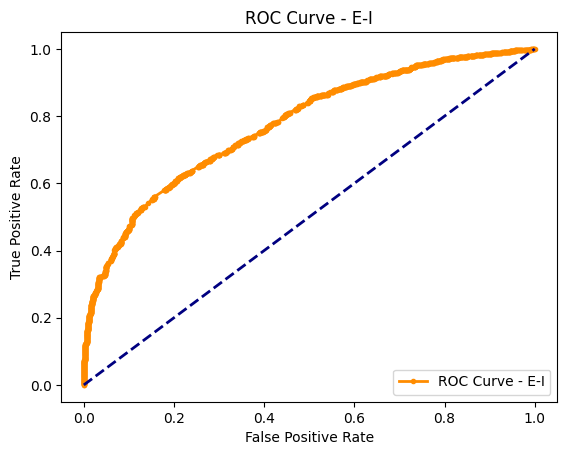

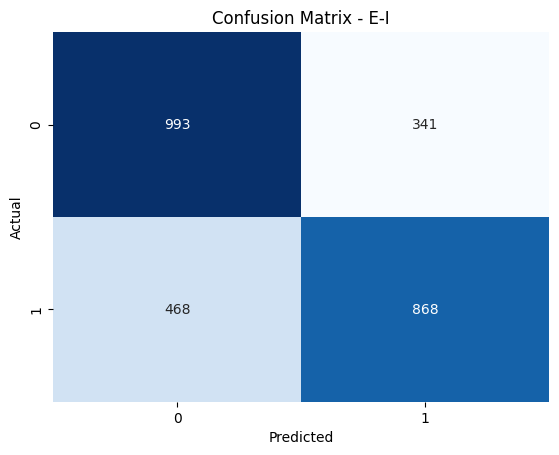

C:\Users\devra\AppData\Local\Temp\ipykernel_12012\1149794335.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_df = pd.concat([evaluation_df, pd.DataFrame({


D:\\devra\\Downloads\\stacking_results\\StackingSMOTE_E-I.sav


c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

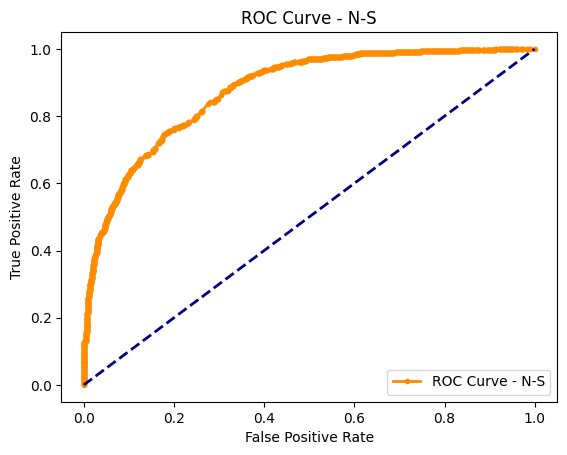

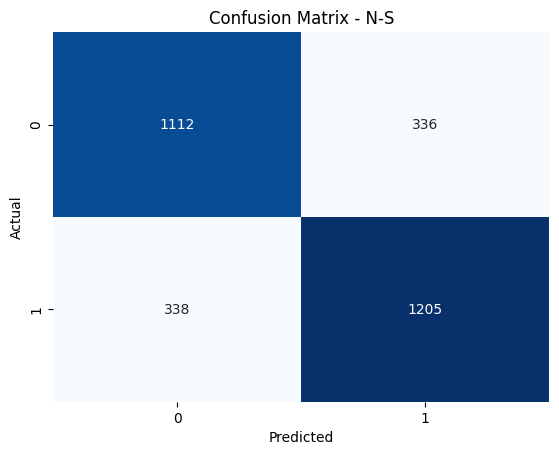

D:\\devra\\Downloads\\stacking_results\\StackingSMOTE_N-S.sav


c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

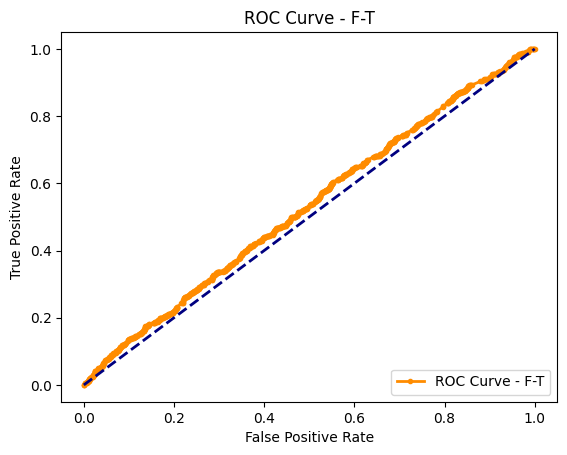

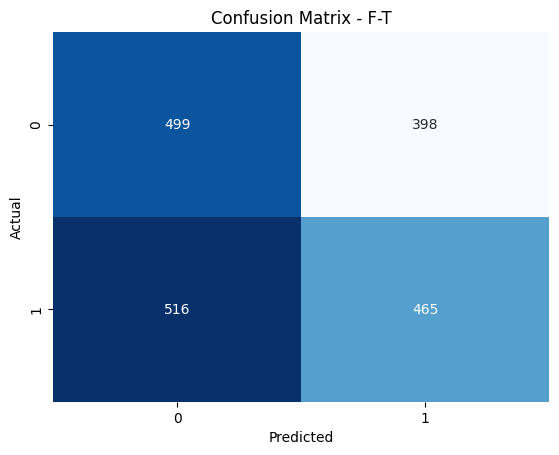

D:\\devra\\Downloads\\stacking_results\\StackingSMOTE_F-T.sav


c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devra\anaconda3\envs\dev1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

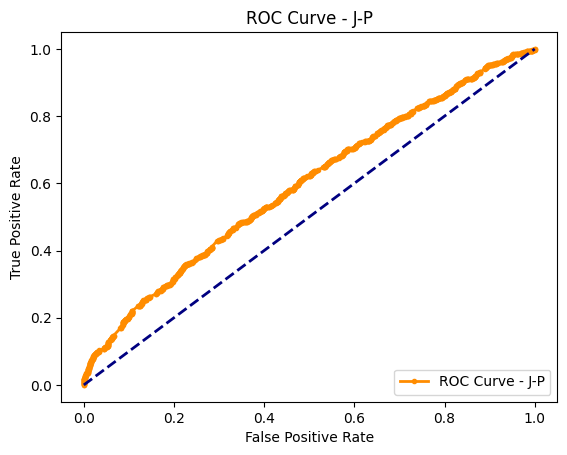

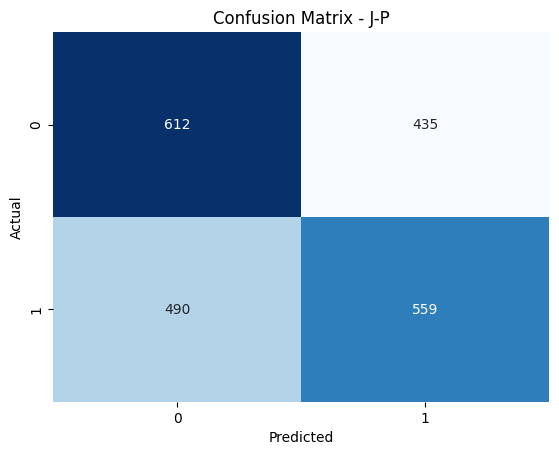

D:\\devra\\Downloads\\stacking_results\\StackingSMOTE_J-P.sav
  Target  Accuracy  Precision    Recall  F1-Score   Roc-AUC
0    E-I  0.697004   0.717949  0.649701  0.682122  0.775661
1    N-S  0.774657   0.781960  0.780946  0.781453  0.876269
2    F-T  0.513312   0.538818  0.474006  0.504338  0.530126
3    J-P  0.558683   0.562374  0.532888  0.547234  0.593441


In [3]:
#### STacking with SMOTE
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec

ROOT = r"C:\\Users\\devra\\Downloads\\Codes_PhD"
DATA_DIR = rf"{ROOT}\\dataset\\bvclassifier"
MBTI_RAW_CSV_PATH = os.path.join(DATA_DIR, "mbti_clean_biTri.csv")
MODEL = rf"{ROOT}\\models\\trained_ml_0603\\"
OUTPUT = r"D:\\devra\\Downloads\\stacking_results\\"

data = pd.read_csv(MBTI_RAW_CSV_PATH)
label_encoder = LabelEncoder()

for target_name in ["E-I", "N-S", "F-T", "J-P"]:
    encoded_target = label_encoder.fit_transform(data[target_name])
    data[f"type_{target_name[0]}"] = encoded_target

training_data = data[["cleaned_post", "E-I", "N-S", "F-T", "J-P"]].copy()

def make_dummies(data, columns=["E-I", "N-S", "F-T", "J-P"]):
    for column in columns:
        temp_dummy = pd.get_dummies(data[column], prefix="type")
        data = data.join(temp_dummy)
    return data

training_data = make_dummies(training_data)

X = training_data[["cleaned_post"]]
y = training_data.drop(columns=["cleaned_post"])

tokenized_posts = X["cleaned_post"].apply(lambda x: x.split())
word2vec_model = Word2Vec(sentences=tokenized_posts, vector_size=100, window=5, min_count=1, workers=4)

y_columns = ["E-I", "N-S", "F-T", "J-P"]
evaluation_df = pd.DataFrame(columns=["Target", "Accuracy", "Precision", "Recall", "F1-Score", "Roc-AUC"])

for target_name in y_columns:
    y_target = y[f"type_{target_name[0]}"]
    X_transformed = word2vec_model.wv[X["cleaned_post"].apply(lambda x: x.split()).sum()]
    X_target = X_transformed[y_target.index]
    # Using Word2Vec for vectorization
    X_df = pd.DataFrame(X_target, index=X.index)

    # Using SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_over, y_over = smote.fit_resample(X_df.loc[y_target.index], y_target)

    X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

    base_models = [(name, pickle.load(open(f'{MODEL}{name}_{target_name}.sav', 'rb'))) for name in ["DecisionTree",
                                                                                                    "RandomForest", "Xgboost",
                                                                                                    "AdaBoost","LogisticRegression"]]

    # Use Logistic Regression as the final meta-classifier
    meta_classifier = RandomForestClassifier(n_estimators=750)

    # Create the StackingClassifier
    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_classifier, stack_method='auto')

    # Fit the StackingClassifier
    stacking_clf.fit(X_train, y_train)

    # Get the predictions for the test data
    stacking_pred_proba_test = stacking_clf.predict_proba(X_test)[:, 1]

    # Evaluate the ensemble
    accuracy = metrics.accuracy_score(y_test, stacking_pred_proba_test.round())
    precision = metrics.precision_score(y_test, stacking_pred_proba_test.round())
    recall = metrics.recall_score(y_test, stacking_pred_proba_test.round())
    f1_score = metrics.f1_score(y_test, stacking_pred_proba_test.round())
    roc_auc = metrics.roc_auc_score(y_test, stacking_pred_proba_test)

    # Plot ROC curve
    fpr, tpr, _ = metrics.roc_curve(y_test, stacking_pred_proba_test, drop_intermediate=False)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve - {target_name}', marker='.')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {target_name}')
    plt.legend(loc='lower right')
    plt.savefig(f'{OUTPUT}ROC_{target_name}_stackingSMOTE_RF.png')
    plt.show()

    # Plot Confusion Matrix
    stacking_pred_binary = stacking_pred_proba_test.round()
    cm = confusion_matrix(y_test, stacking_pred_binary)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {target_name}')
    plt.savefig(f'{OUTPUT}ConfusionMatrix_{target_name}_stackingSMOTE_RF.png')
    plt.show()

    # Update the evaluation_df DataFrame
    evaluation_df = pd.concat([evaluation_df, pd.DataFrame({
        "Target": [target_name],
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1-Score": [f1_score],
        "Roc-AUC": [roc_auc]
    })], ignore_index=True)

    # Save the Stacking Classifier
    stacking_filename = f'{OUTPUT}StackingSMOTE_{target_name}.sav'
    print(stacking_filename)
    pickle.dump(stacking_clf, open(stacking_filename, 'wb'))

# Save the evaluation_df to a CSV file
evaluation_df.to_csv(os.path.join(OUTPUT, 'evaluation_StackingSMOTE_RF.csv'), index=False)
print(evaluation_df)